In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [47]:
df = pd.read_csv("C:\\Users\\SAINADH\\Downloads\\OneDrive\\Documents\\Desktop\\who_life_exp.csv")
df.head()

,country,country_code,region,year,life_expectancy,life_expectancy_at_60,adult_mortality_rate,infant_mortality_rate,child_mortality_age_1_4,alcohol_consumption,...,current_health_expenditure_gdp,population_un_employement,under_five_mortality,une_life_expectancy,hiv_prevalence,une_gni_index,poverty_rate,education_expenditure,literacy_rate,school_enrollment_rate
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3111 non-null   object 
 1   country_code                    3111 non-null   object 
 2   region                          3111 non-null   object 
 3   year                            3111 non-null   int64  
 4   life_expectancy                 3111 non-null   float64
 5   life_expectancy_at_60           3111 non-null   float64
 6   adult_mortality_rate            3111 non-null   float64
 7   infant_mortality_rate           3111 non-null   float64
 8   child_mortality_age_1_4         3111 non-null   float64
 9   alcohol_consumption             3061 non-null   float64
 10  average_bmi                     3077 non-null   float64
 11  thinness_age_5_19               3077 non-null   float64
 12  obesity_age_5_19                30

In [49]:
# Rename columns for clarity
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Drop rows with missing critical values
df = df.dropna(subset=[
    "current_health_expenditure_gdp",
    "government_health_expenditure"
])

# Convert year to integer
df["year"] = df["year"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         2994 non-null   object 
 1   country_code                    2994 non-null   object 
 2   region                          2994 non-null   object 
 3   year                            2994 non-null   int64  
 4   life_expectancy                 2994 non-null   float64
 5   life_expectancy_at_60           2994 non-null   float64
 6   adult_mortality_rate            2994 non-null   float64
 7   infant_mortality_rate           2994 non-null   float64
 8   child_mortality_age_1_4         2994 non-null   float64
 9   alcohol_consumption             2969 non-null   float64
 10  average_bmi                     2977 non-null   float64
 11  thinness_age_5_19               2977 non-null   float64
 12  obesity_age_5_19                2977 no

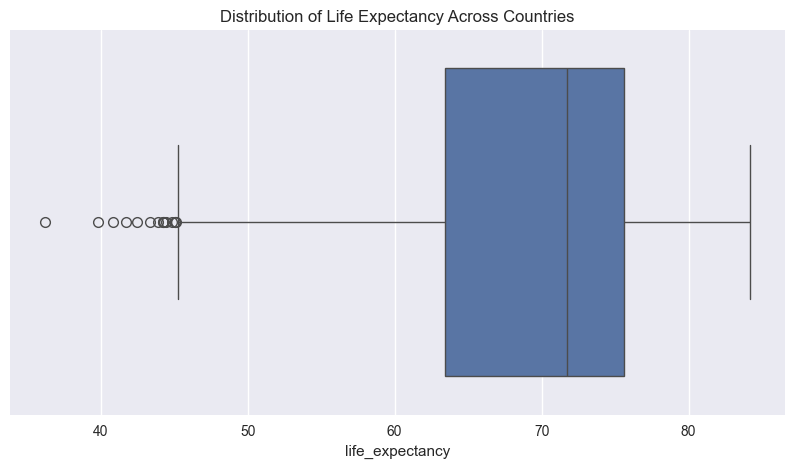

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="life_expectancy")
plt.title("Distribution of Life Expectancy Across Countries")
plt.show()

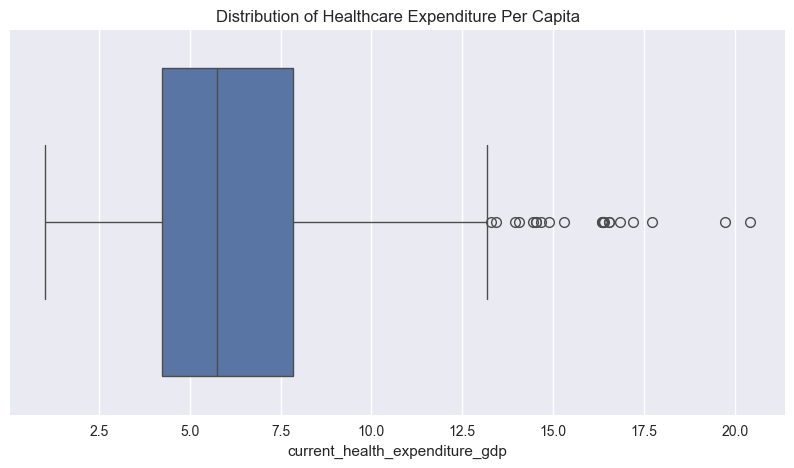

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="current_health_expenditure_gdp")
plt.title("Distribution of Healthcare Expenditure Per Capita")
plt.show()

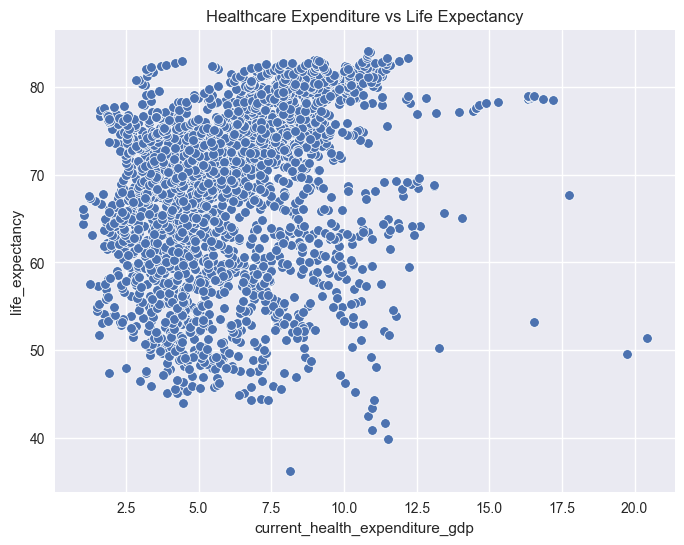

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="current_health_expenditure_gdp",
    y="life_expectancy"
)
plt.title("Healthcare Expenditure vs Life Expectancy")
plt.show()

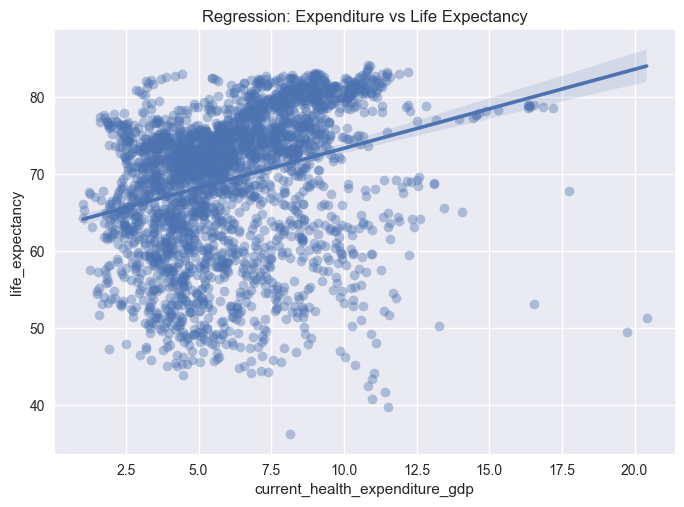

In [53]:
sns.regplot(
    data=df,
    x="current_health_expenditure_gdp",
    y="life_expectancy",
    scatter_kws={"alpha":0.4}
)
plt.title("Regression: Expenditure vs Life Expectancy")
plt.show()

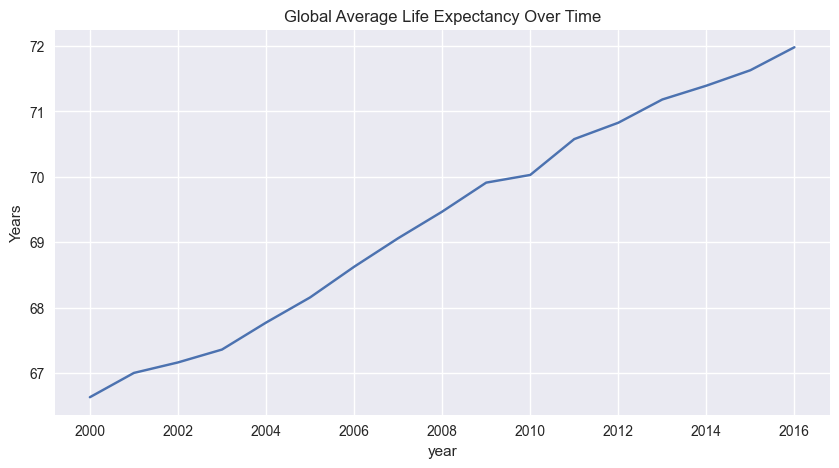

In [54]:
trend = df.groupby("year")["life_expectancy"].mean()

plt.figure(figsize=(10,5))
trend.plot()
plt.title("Global Average Life Expectancy Over Time")
plt.ylabel("Years")
plt.show()

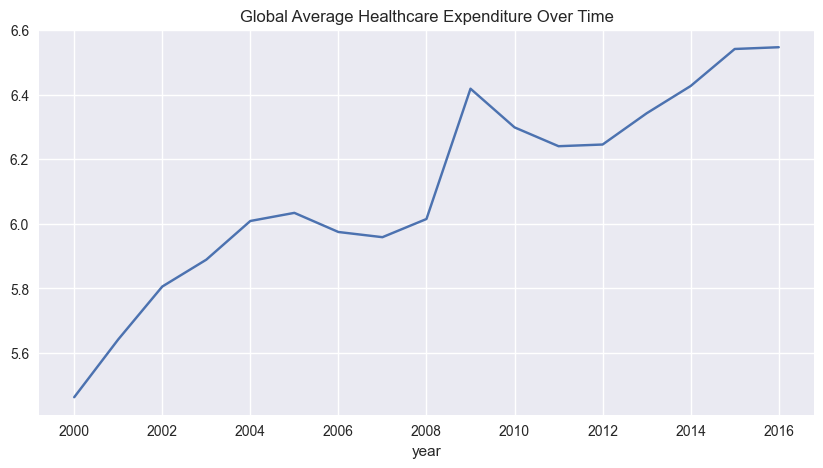

In [55]:
trend_exp = df.groupby("year")["current_health_expenditure_gdp"].mean()

plt.figure(figsize=(10,5))
trend_exp.plot()
plt.title("Global Average Healthcare Expenditure Over Time")
plt.show()

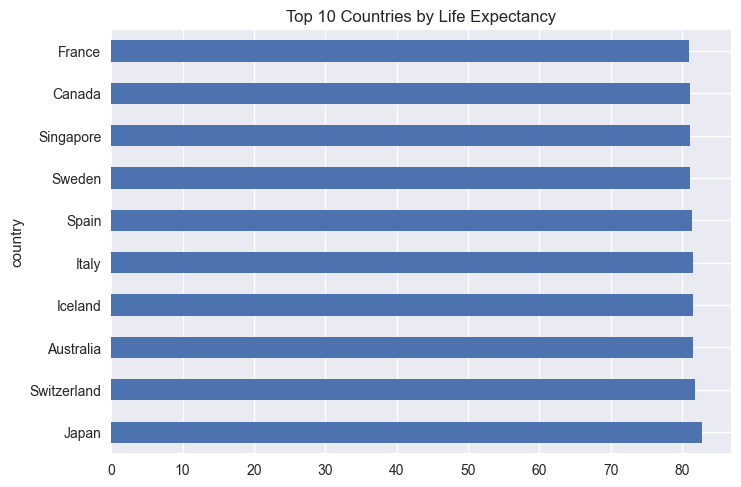

In [56]:
top_life = (
    df.groupby("country")["life_expectancy"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_life.plot(kind="barh")
plt.title("Top 10 Countries by Life Expectancy")
plt.show()

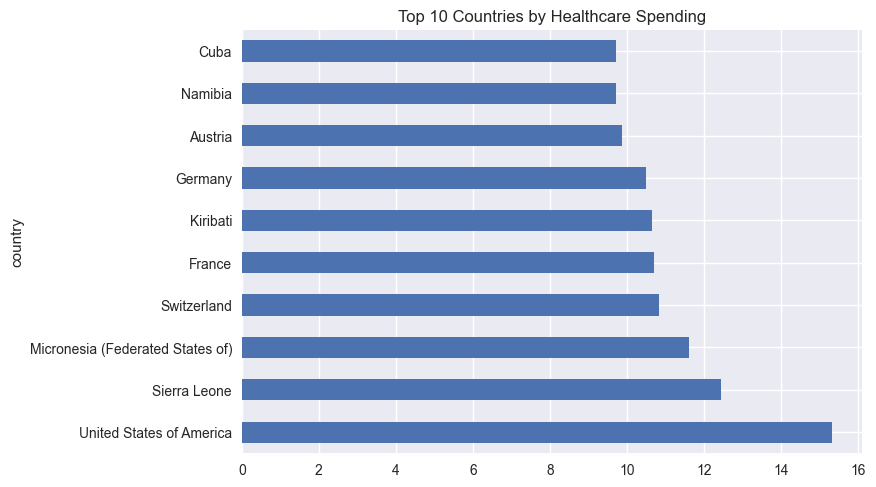

In [57]:
top_spend = (
    df.groupby("country")["current_health_expenditure_gdp"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_spend.plot(kind="barh")
plt.title("Top 10 Countries by Healthcare Spending")
plt.show()

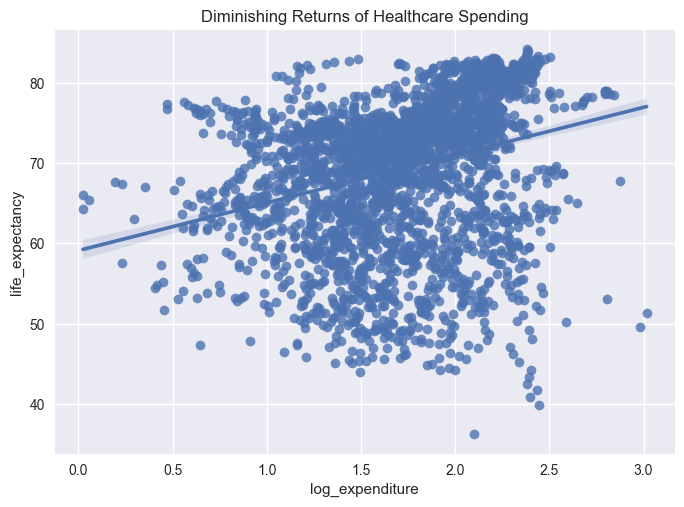

In [58]:
df["log_expenditure"] = np.log(df["current_health_expenditure_gdp"])

sns.regplot(
    data=df,
    x="log_expenditure",
    y="life_expectancy"
)
plt.title("Diminishing Returns of Healthcare Spending")
plt.show()

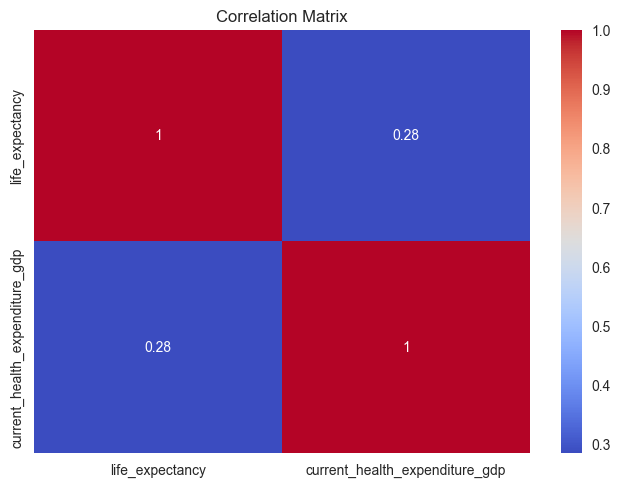

In [59]:
corr = df[[
    "life_expectancy",
    "current_health_expenditure_gdp"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

2026-02-05 20:30:03.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-05 20:30:03.809 No runtime found, using MemoryCacheStorageManager
2026-02-05 20:30:03.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-05 20:30:03.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-05 20:30:03.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-05 20:30:03.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-05 20:30:03.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-05 20:30:03.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-05 20:30:03.828 Thread 'MainThread':

DeltaGenerator()

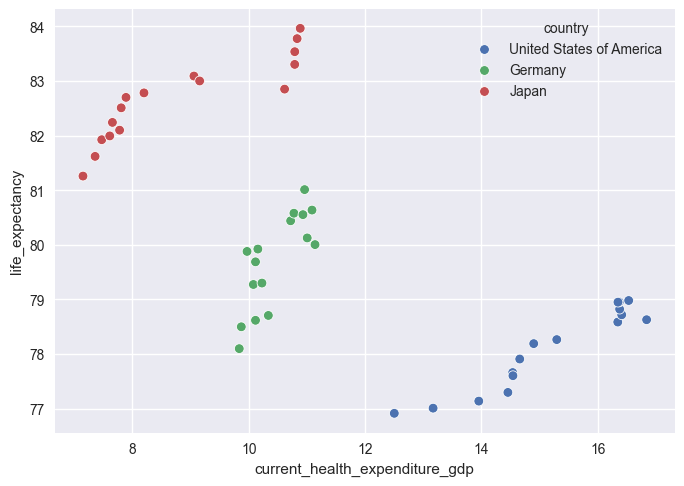

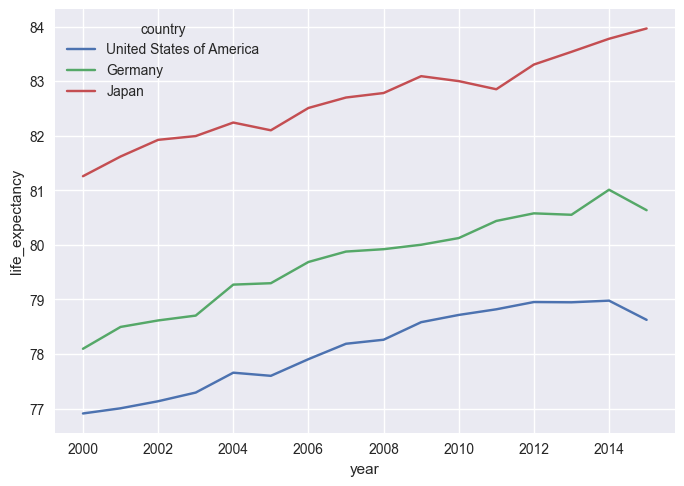

In [60]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Healthcare vs Life Expectancy", layout="wide")

@st.cache_data
def load_data():
    df = pd.read_csv("C:\\Users\\SAINADH\\Downloads\\OneDrive\\Documents\\Desktop\\who_life_exp.csv")
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    df = df.dropna(subset=["life_expectancy", "current_health_expenditure_gdp"])
    return df

df = load_data()

st.title("Healthcare Expenditure and Life Expectancy Across Nations")

# Sidebar filters
countries = st.multiselect(
    "Select Countries",
    options=sorted(df["country"].unique()),
    default=["United States of America", "Japan", "Germany"]
)

year_range = st.slider(
    "Select Year Range",
    int(df["year"].min()),
    int(df["year"].max()),
    (2000, 2015)
)

filtered_df = df[
    (df["country"].isin(countries)) &
    (df["year"].between(year_range[0], year_range[1]))
]

# Scatter plot
st.subheader("Healthcare Spending vs Life Expectancy")
fig, ax = plt.subplots()
sns.scatterplot(
    data=filtered_df,
    x="current_health_expenditure_gdp",
    y="life_expectancy",
    hue="country",
    ax=ax
)
st.pyplot(fig)

# Trend plot
st.subheader("Life Expectancy Trends Over Time")
fig, ax = plt.subplots()
sns.lineplot(
    data=filtered_df,
    x="year",
    y="life_expectancy",
    hue="country",
    ax=ax
)
st.pyplot(fig)